Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


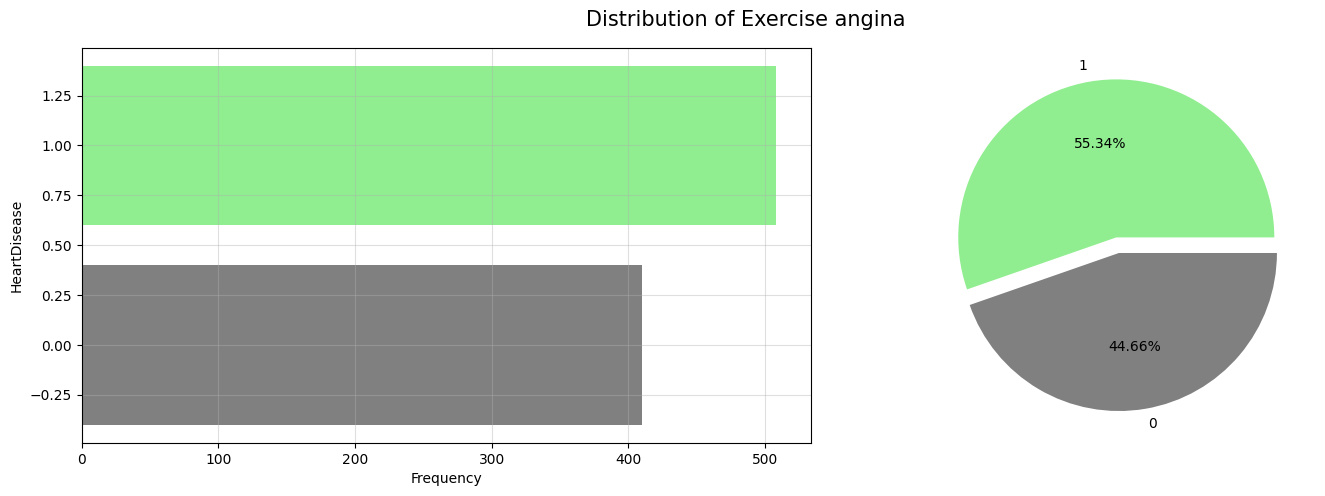

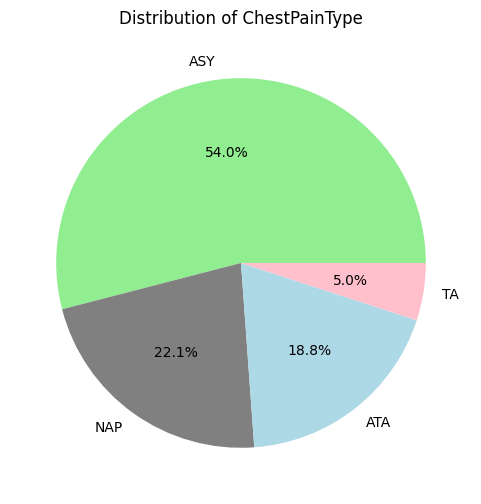

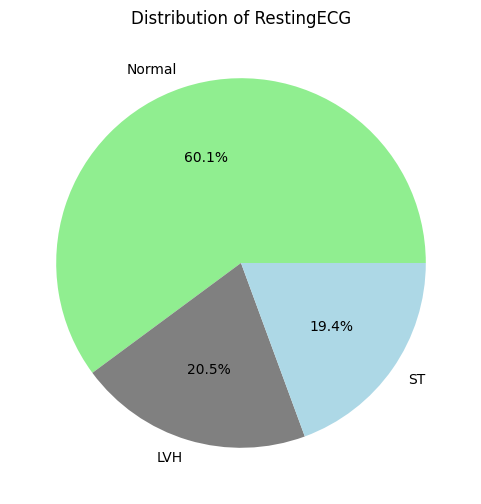

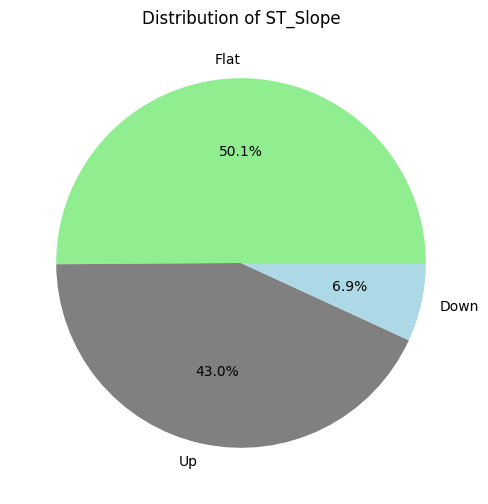

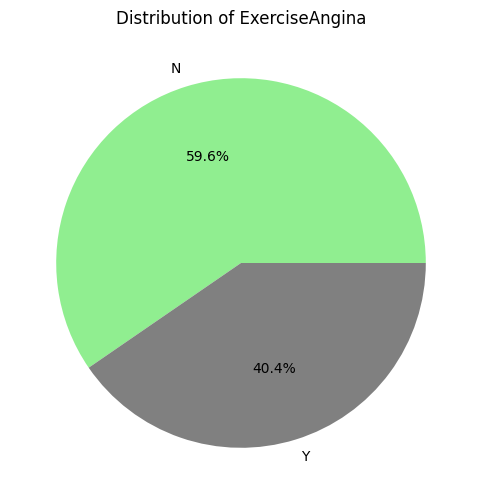

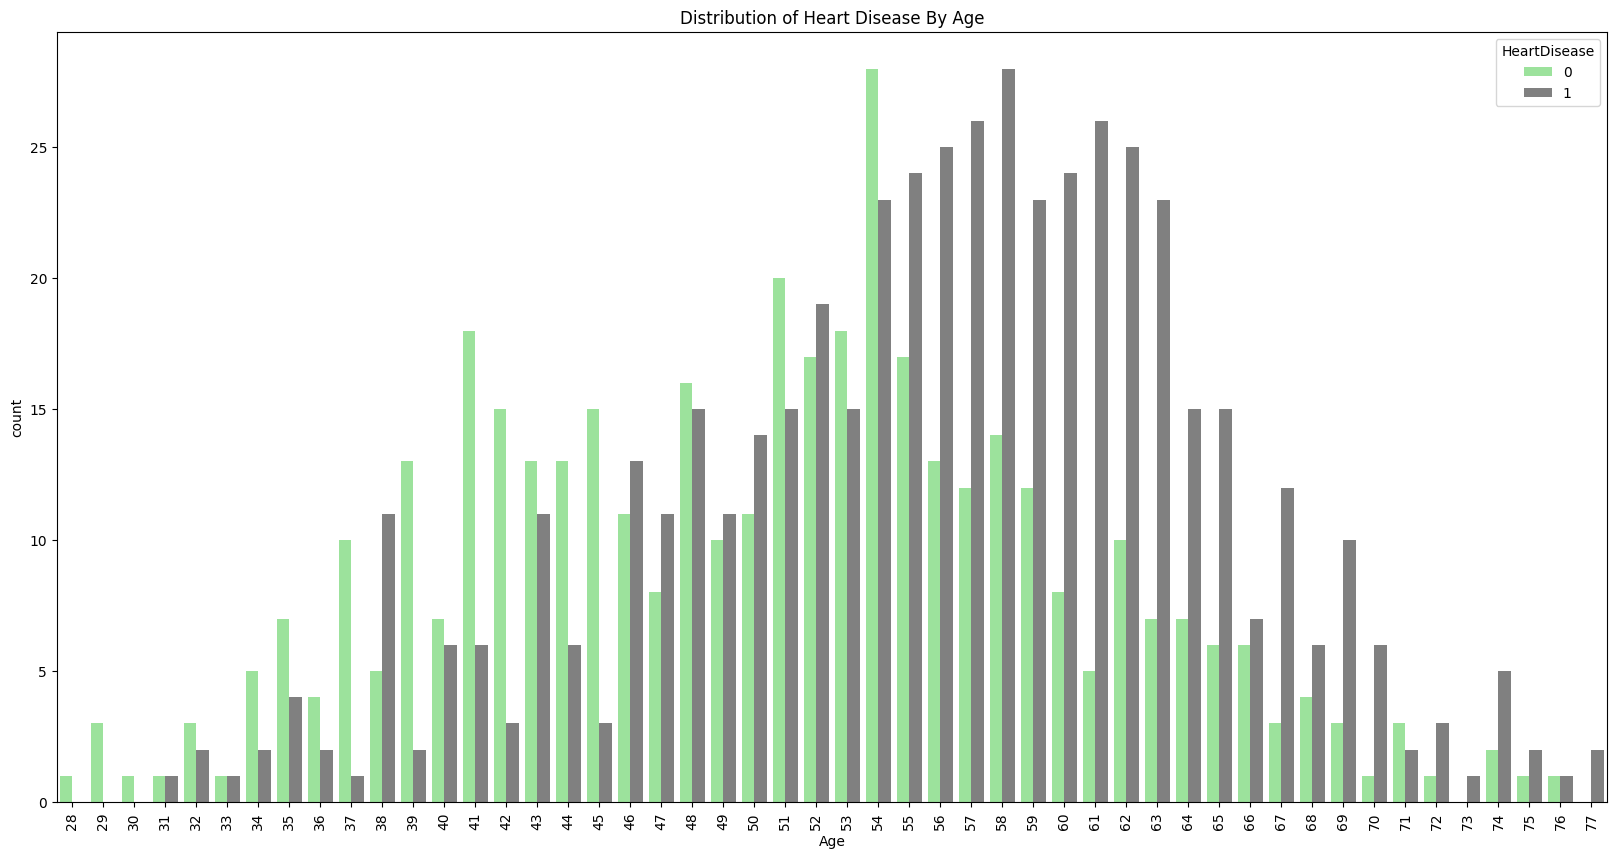

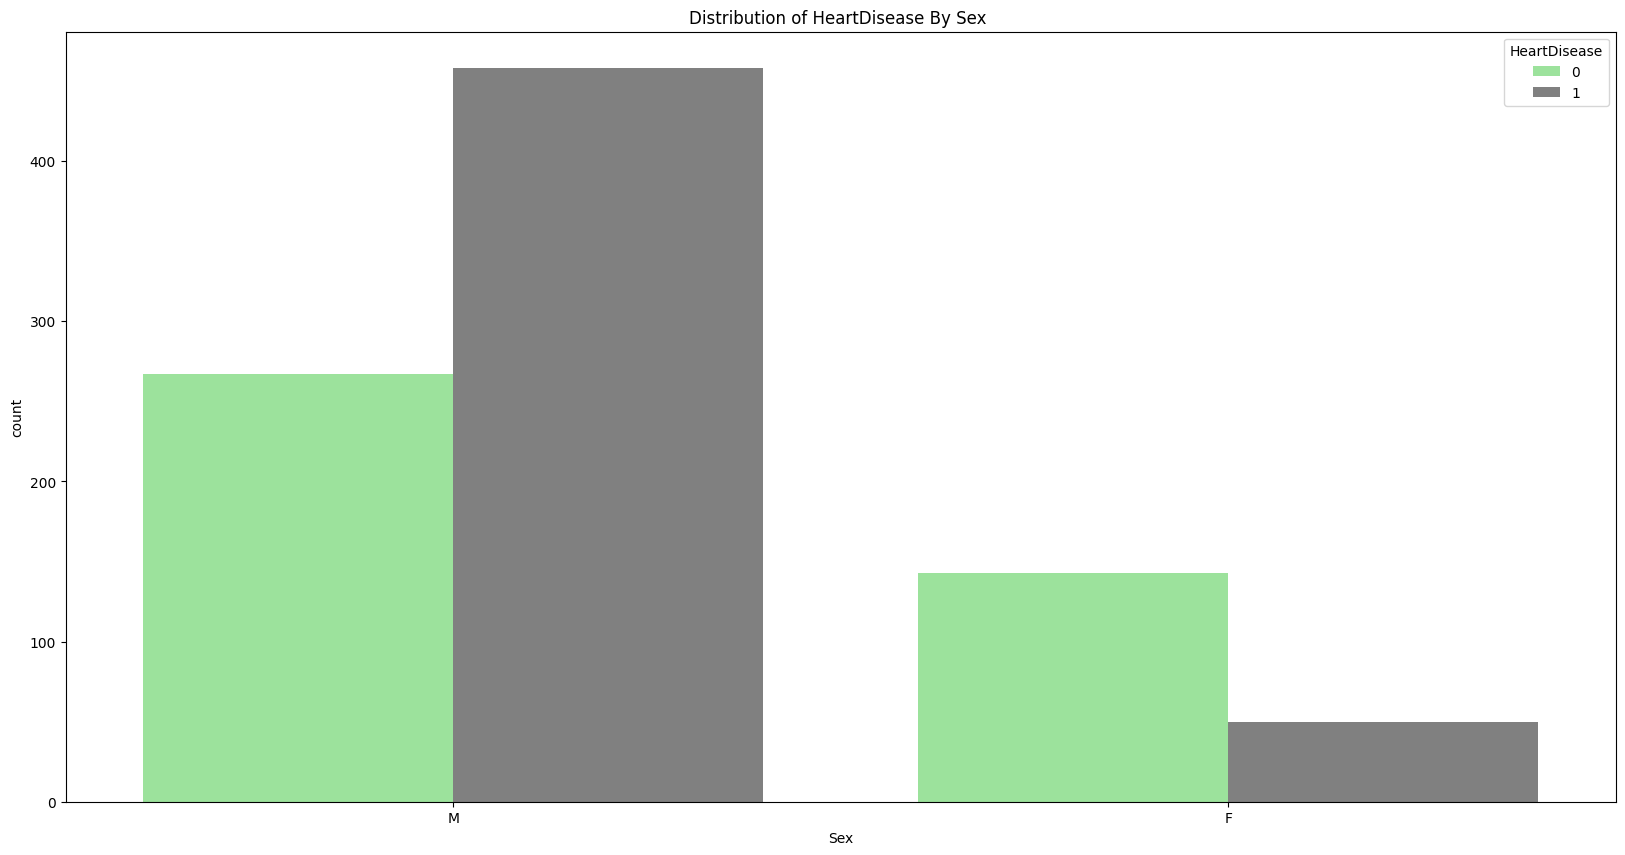

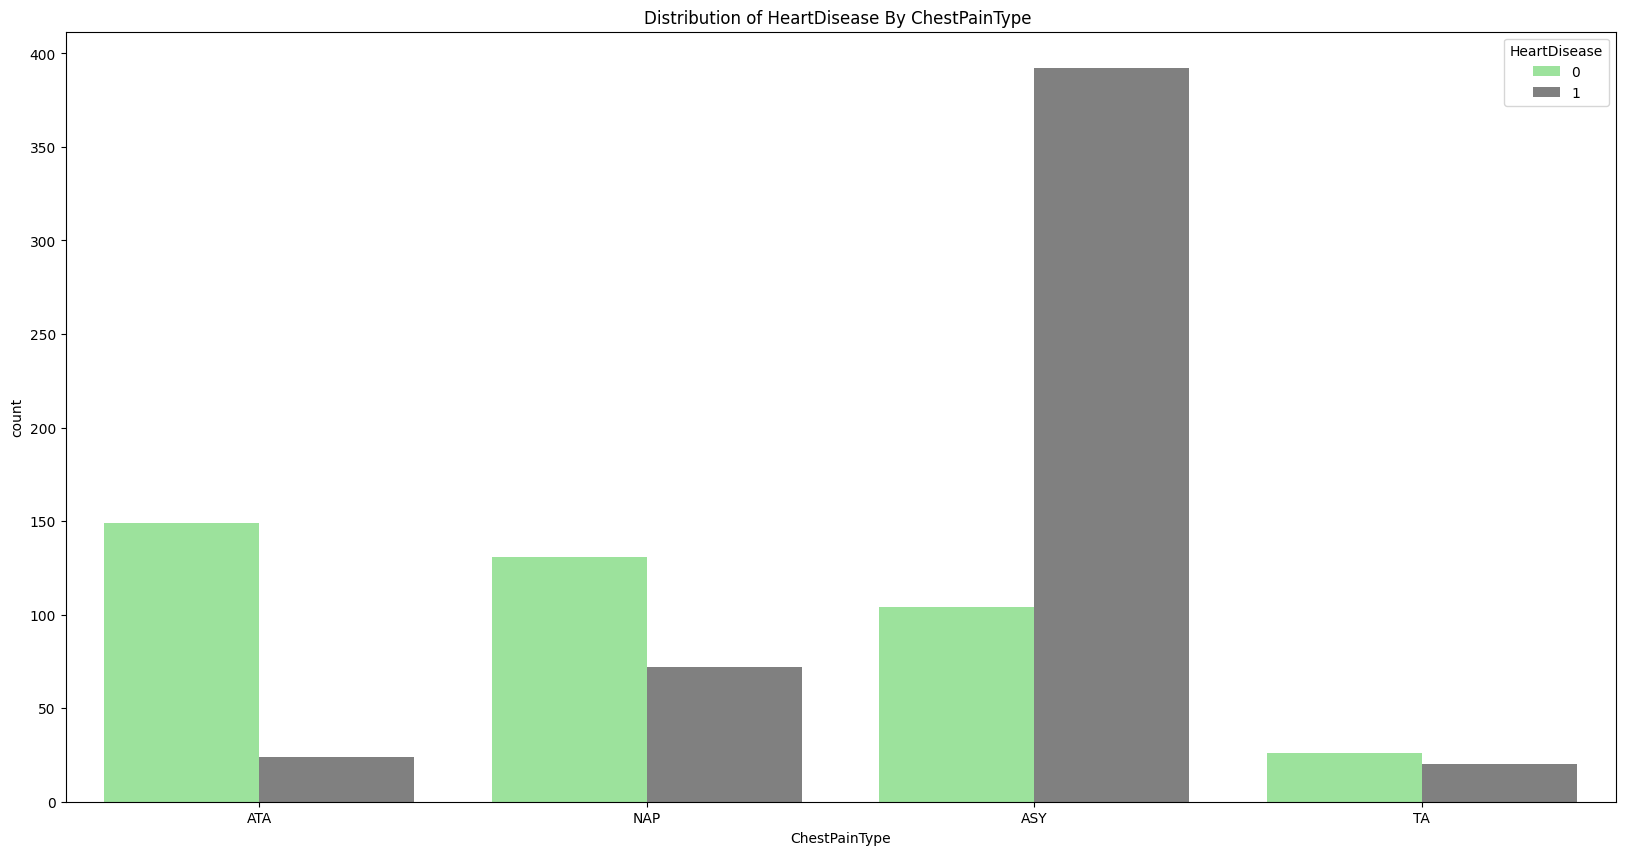

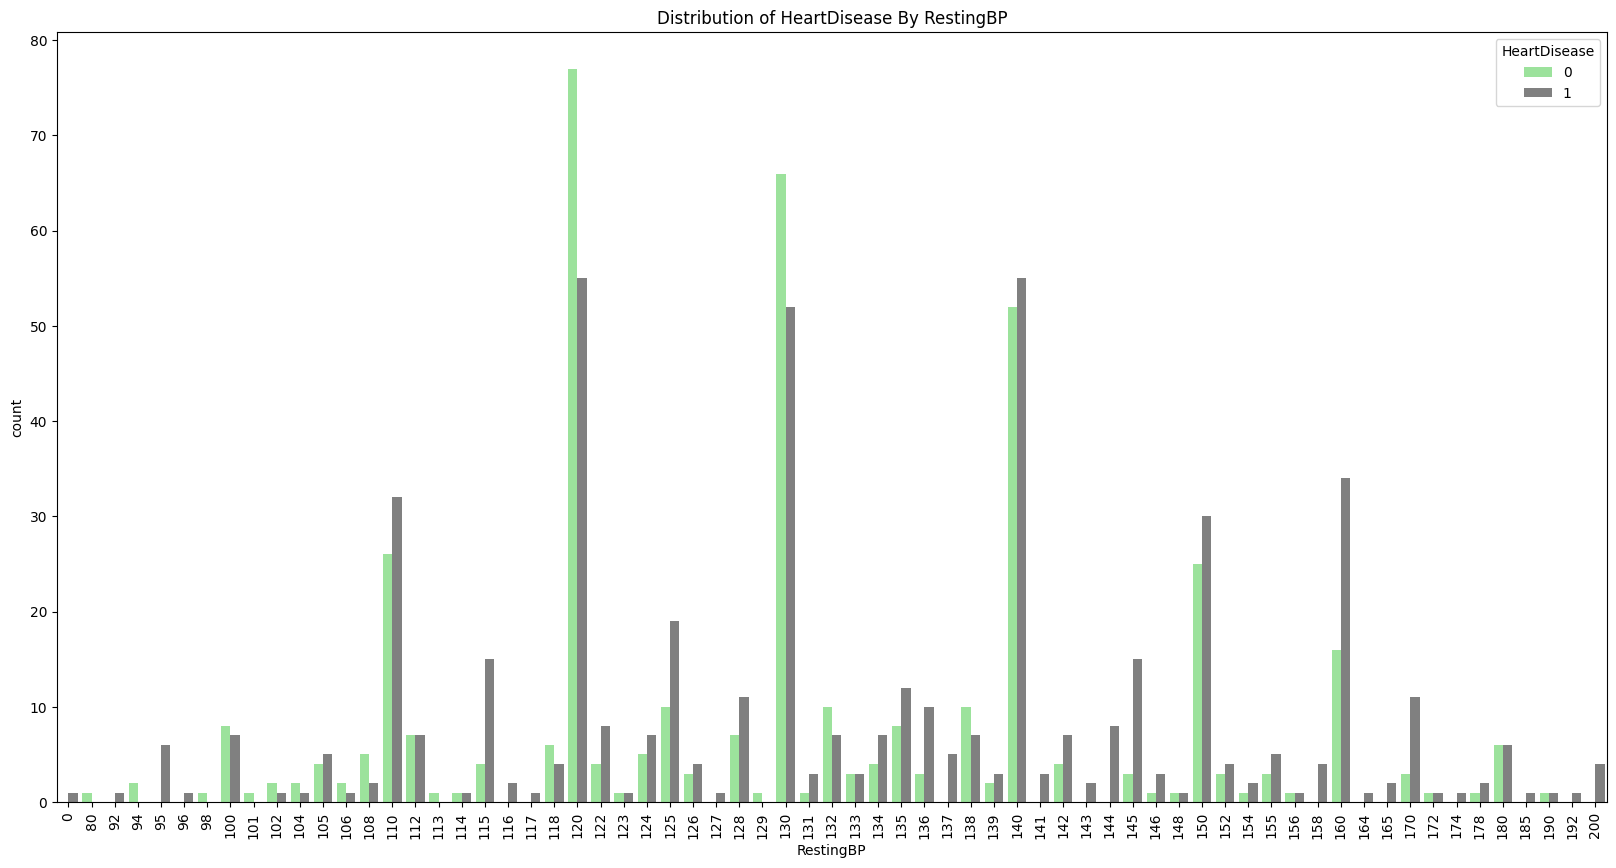

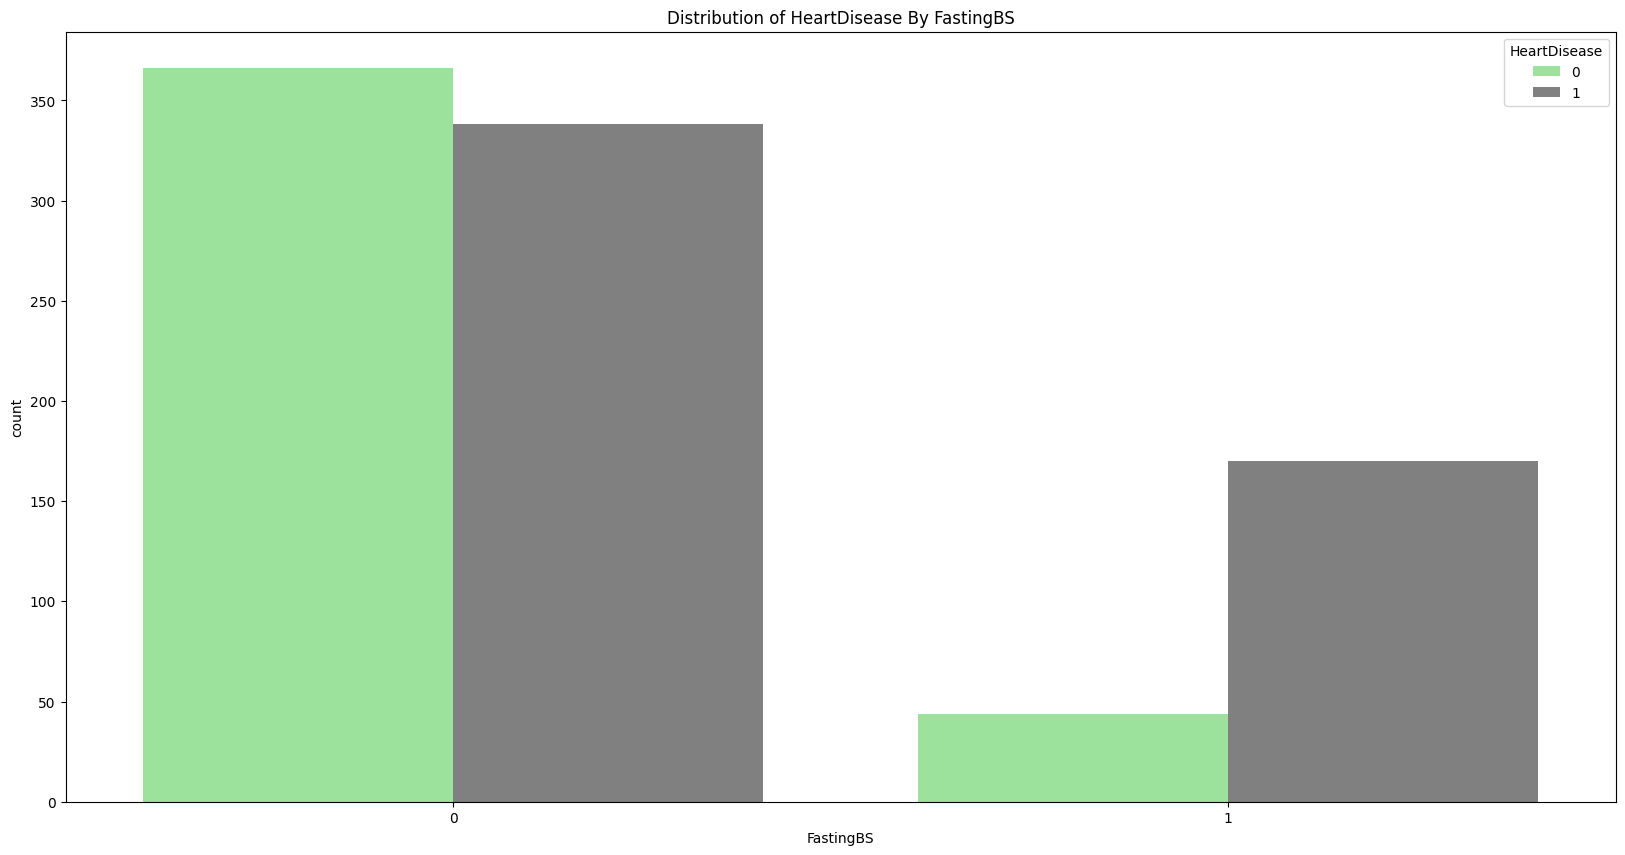

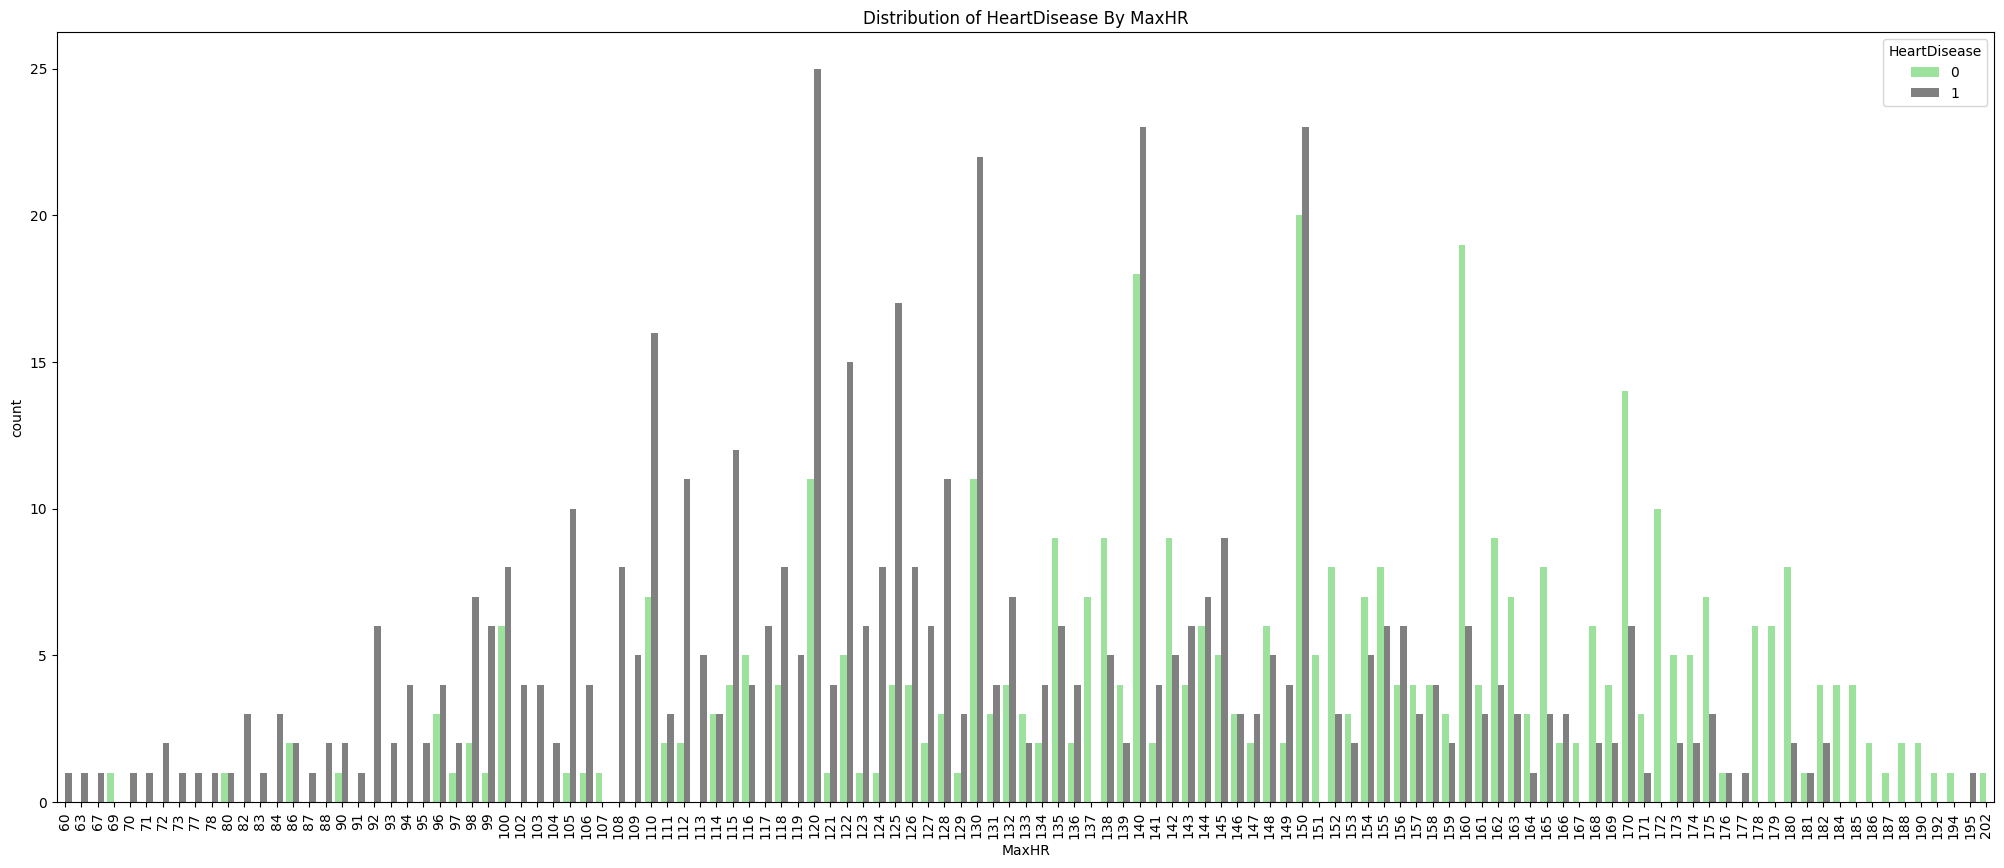

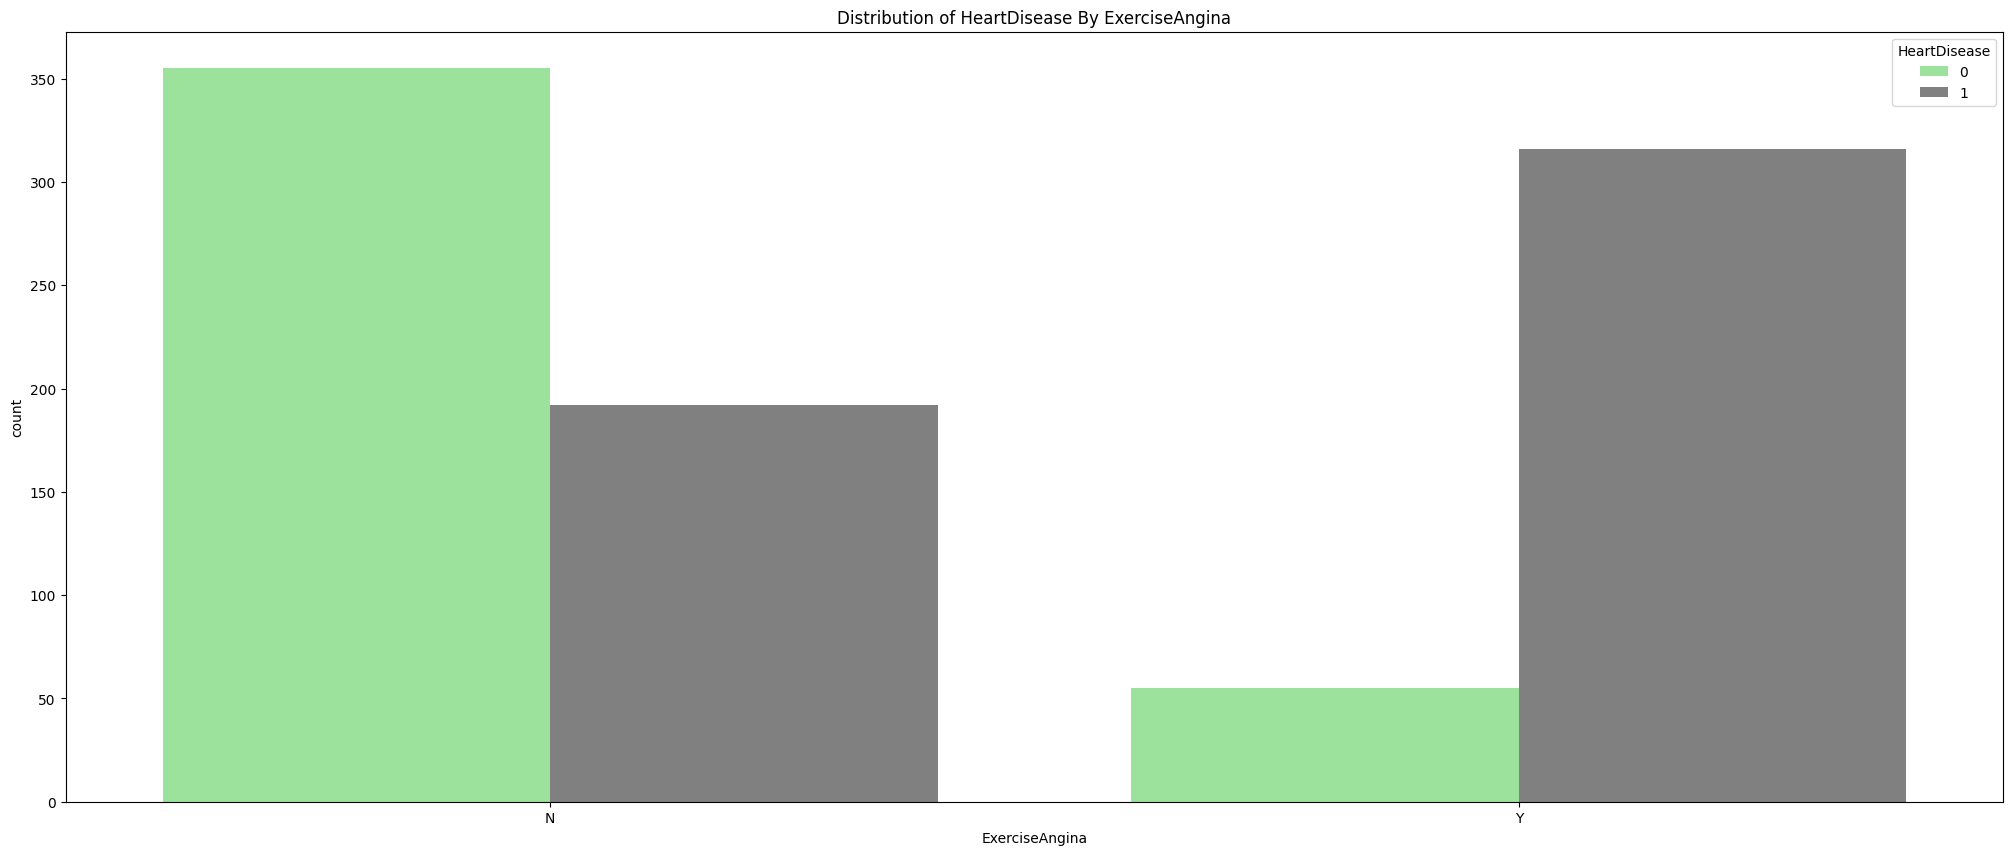

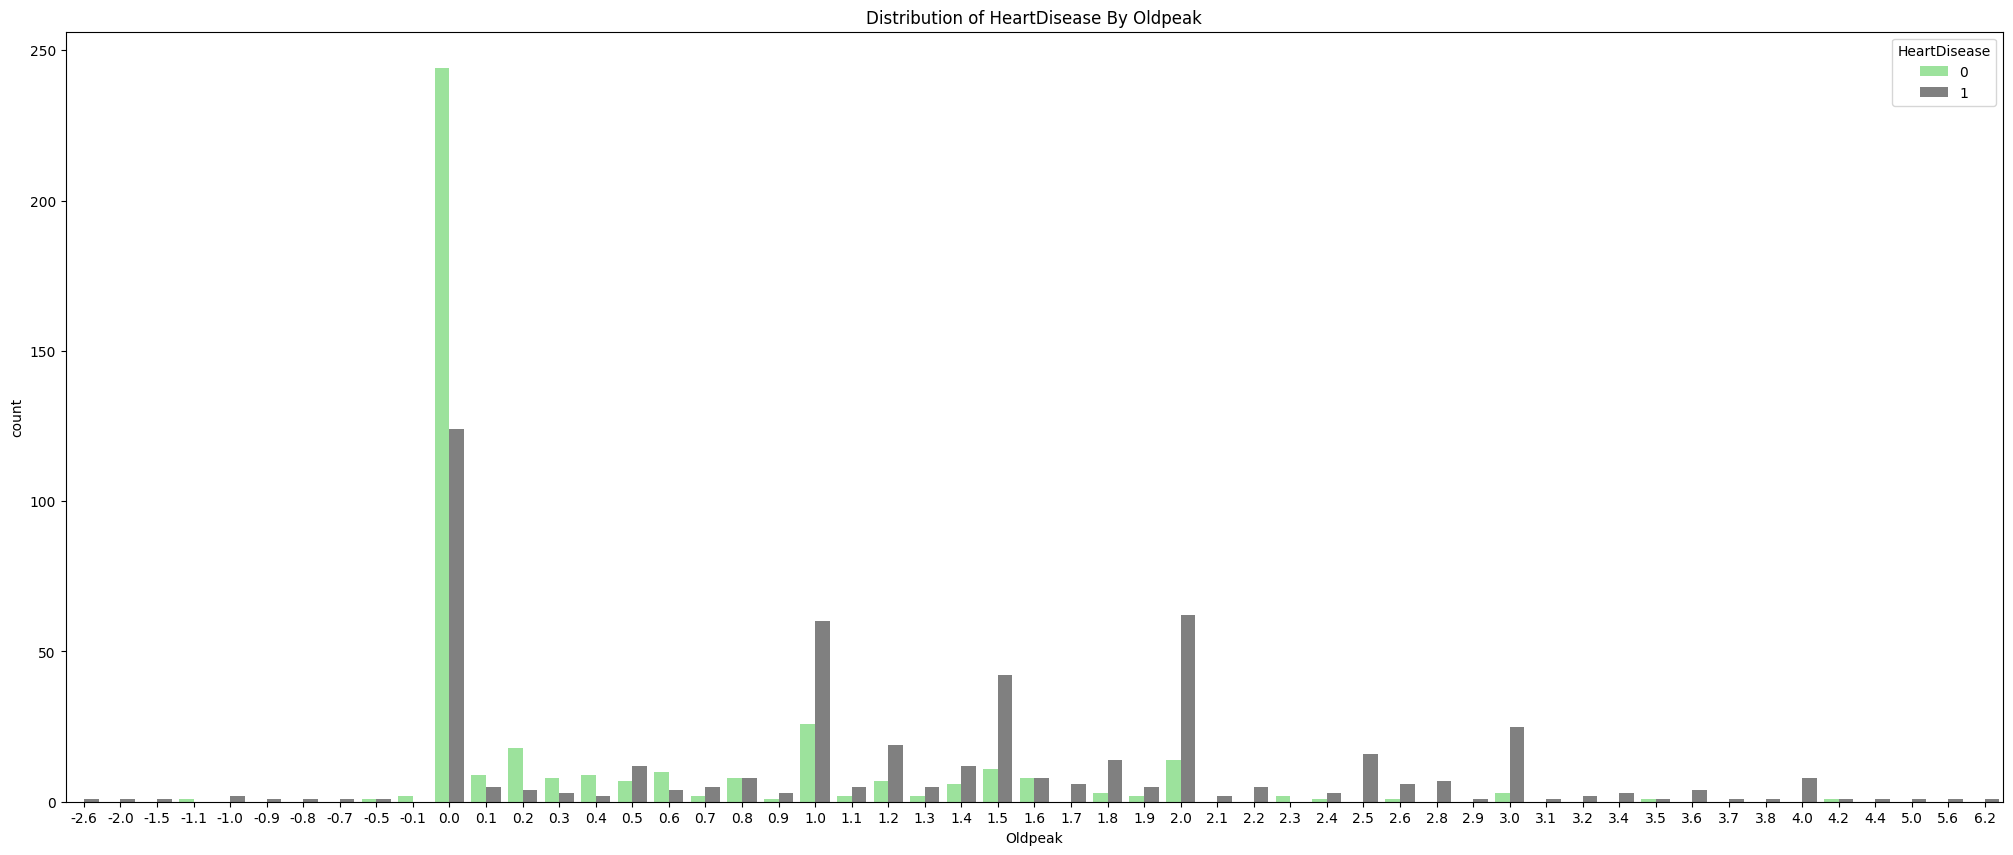

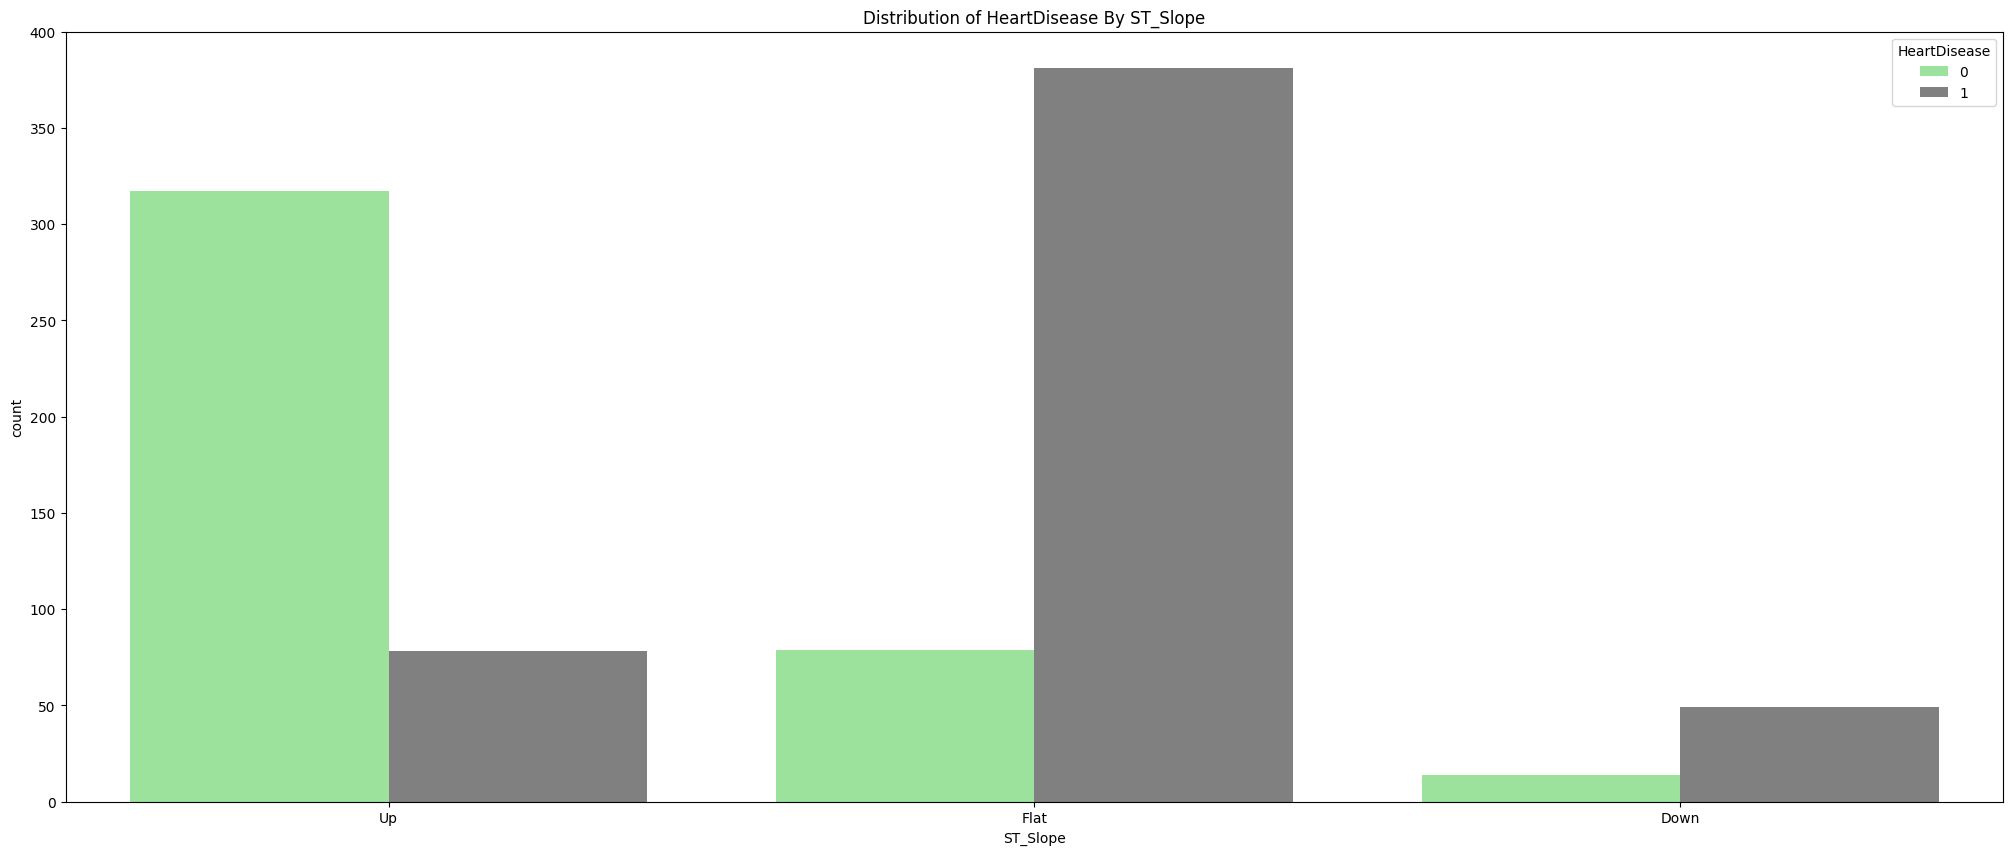

<ipython-input-7-19beb69906e5>:149: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


<Figure size 1500x1000 with 0 Axes>

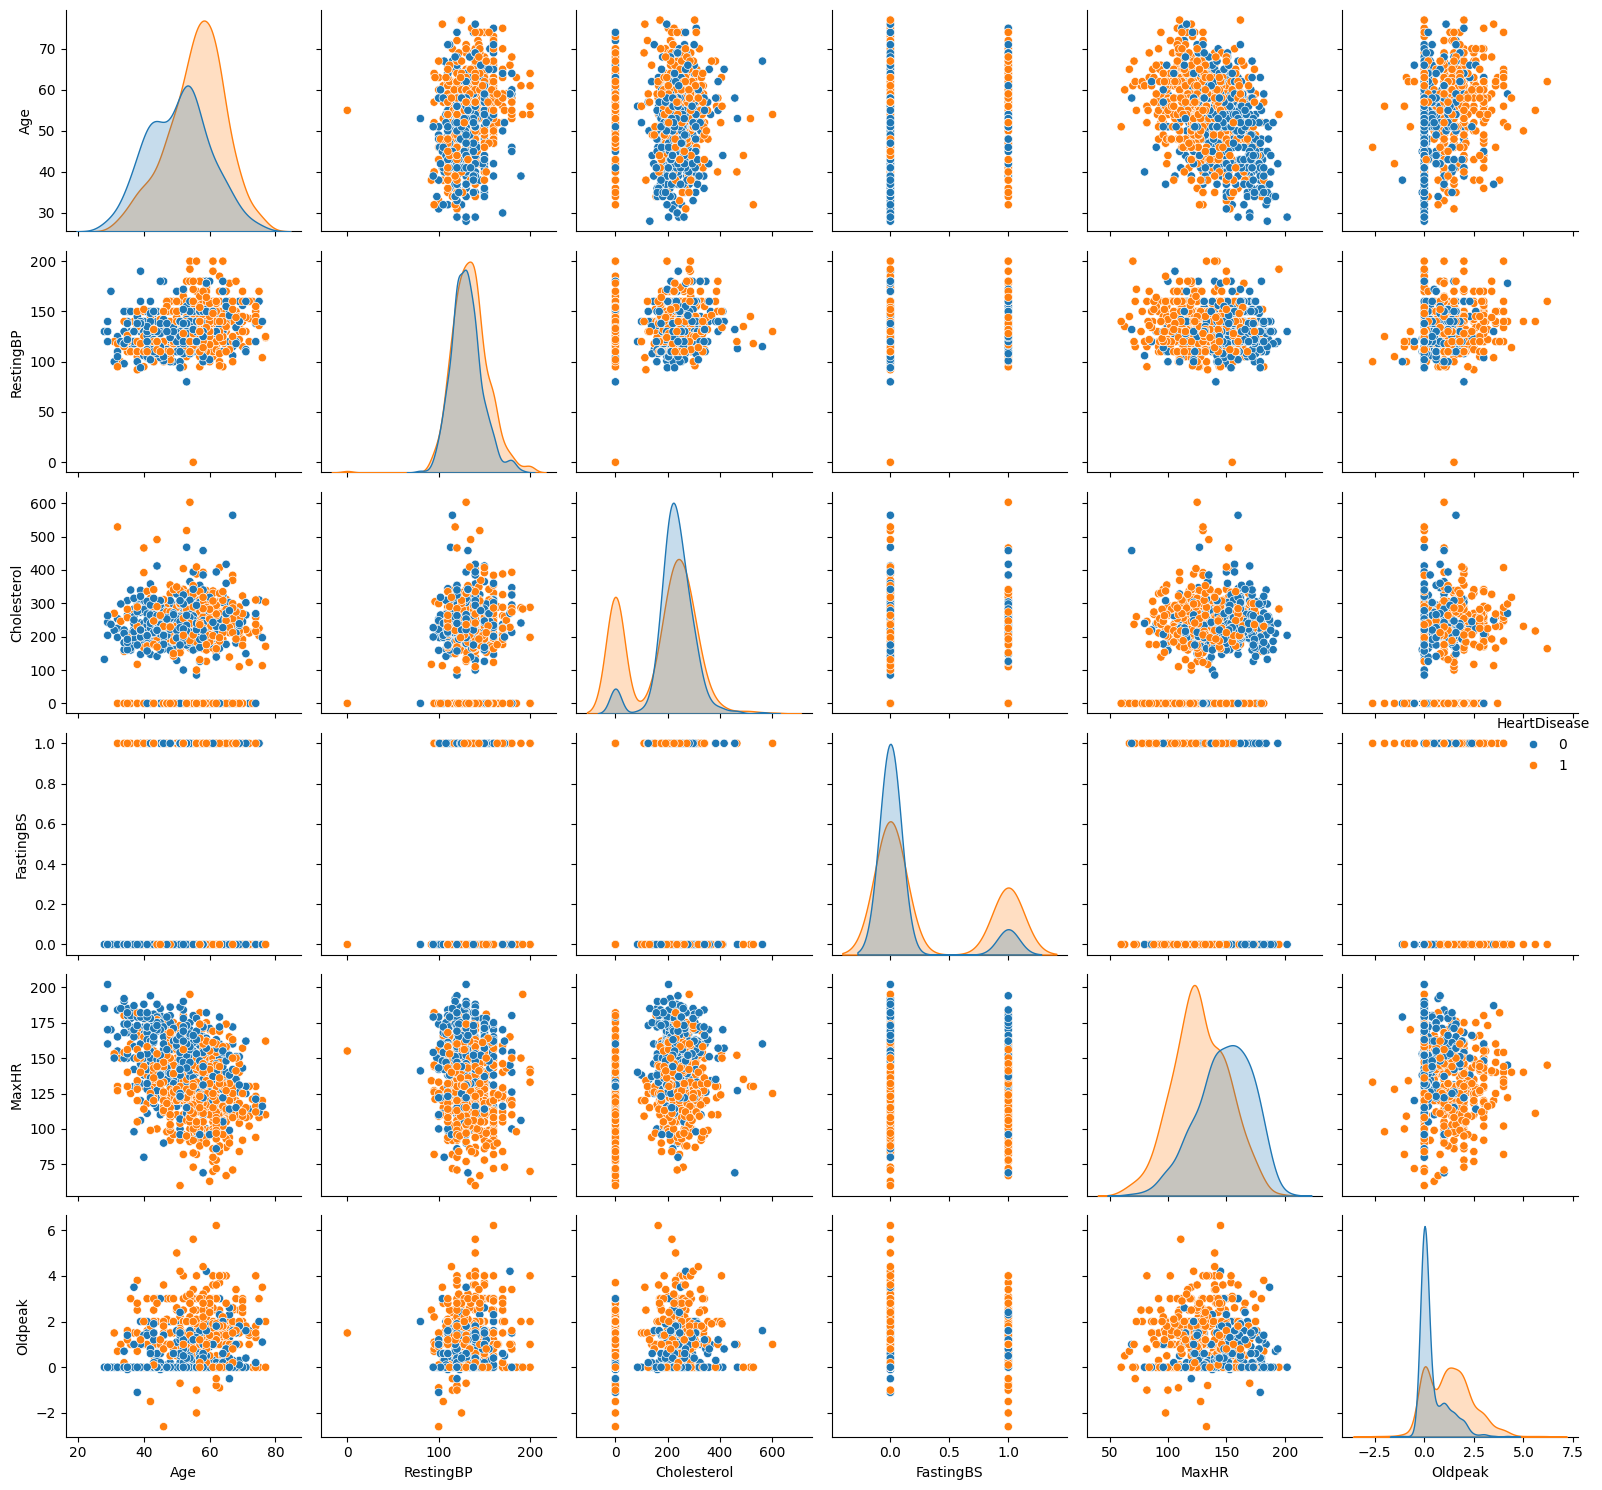

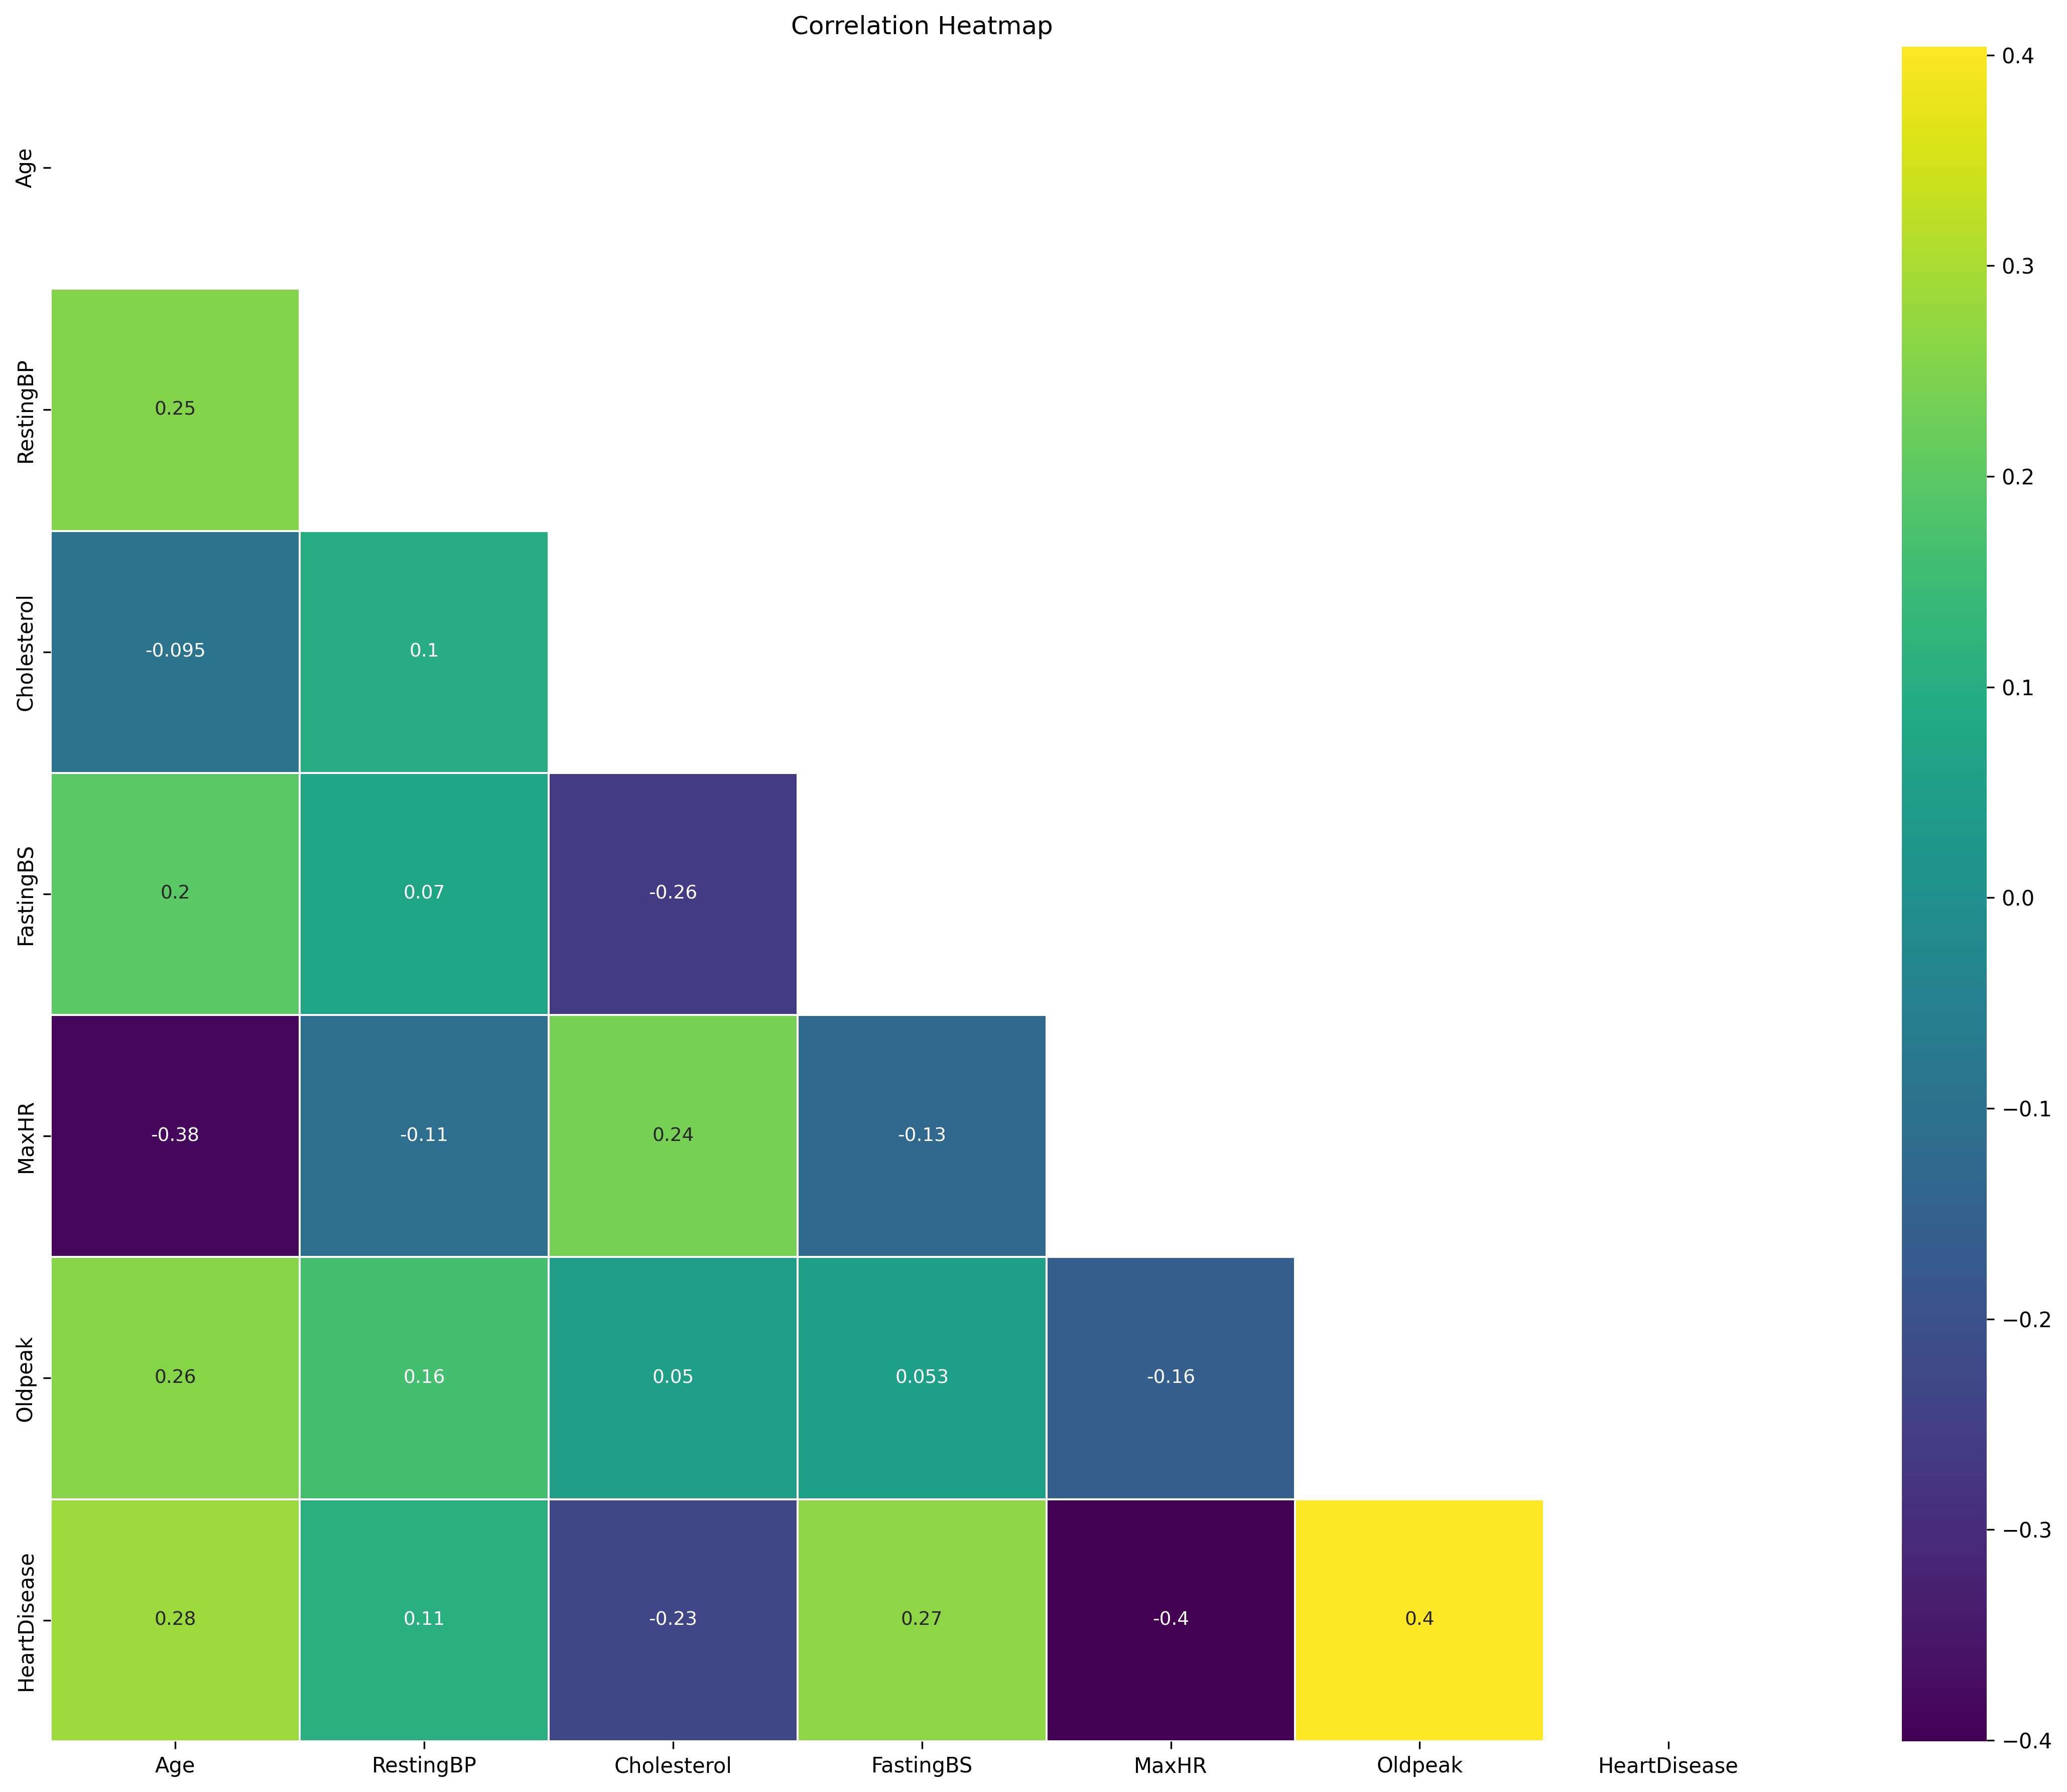

(733, 9)
(184, 9)
(733,)
(184,)
Accuracy test: 85.33%
Accuracy train: 85.54%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      0.88      0.83        74
         1.0       0.91      0.84      0.87       110

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



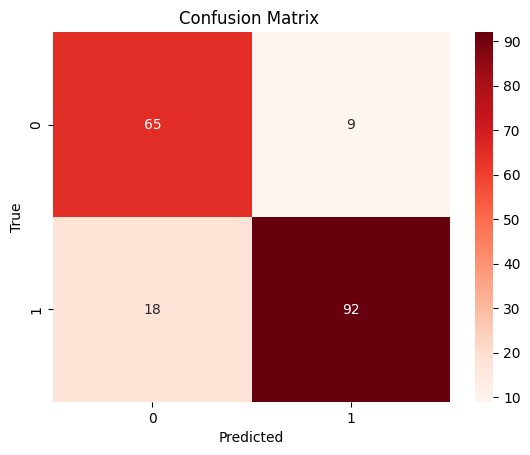

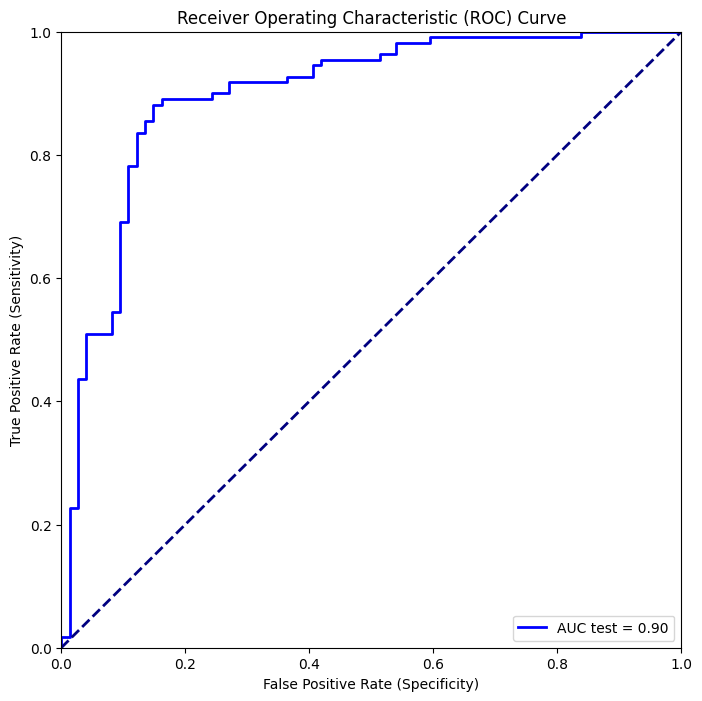

Accuracy test: 84.24%
Accuracy train: 89.77%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.76      0.89      0.82        74
         1.0       0.92      0.81      0.86       110

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



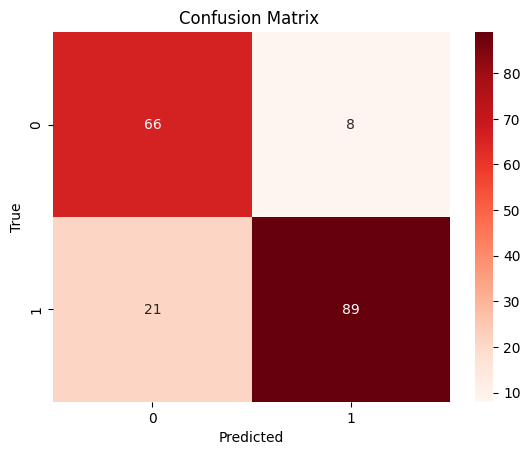

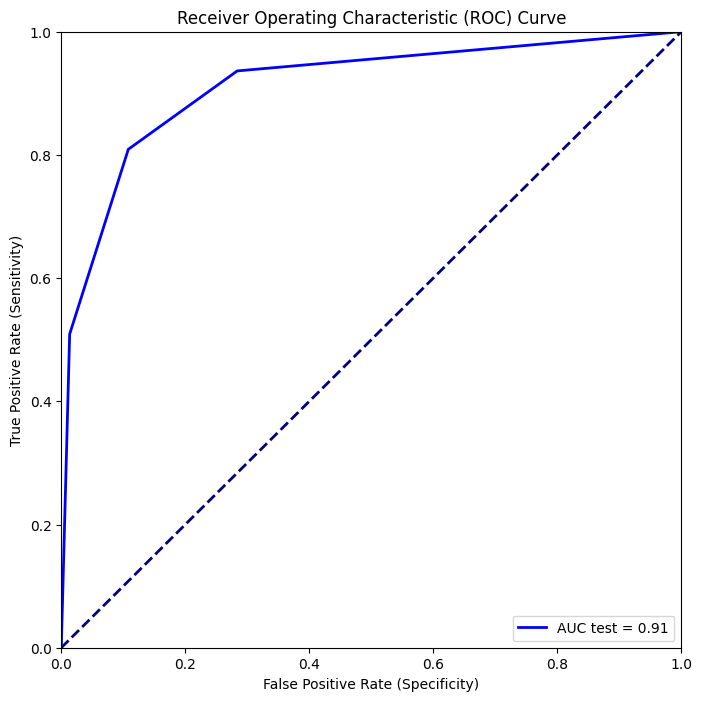

Test Accuracy: 80.98%
Train Accuracy: 100.0%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.73      0.82      0.78        74
         1.0       0.87      0.80      0.83       110

    accuracy                           0.81       184
   macro avg       0.80      0.81      0.81       184
weighted avg       0.82      0.81      0.81       184



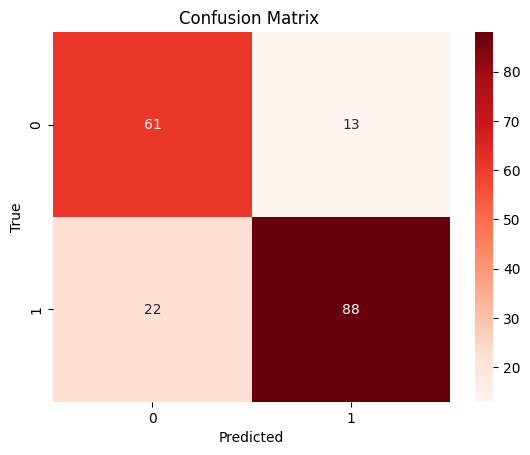

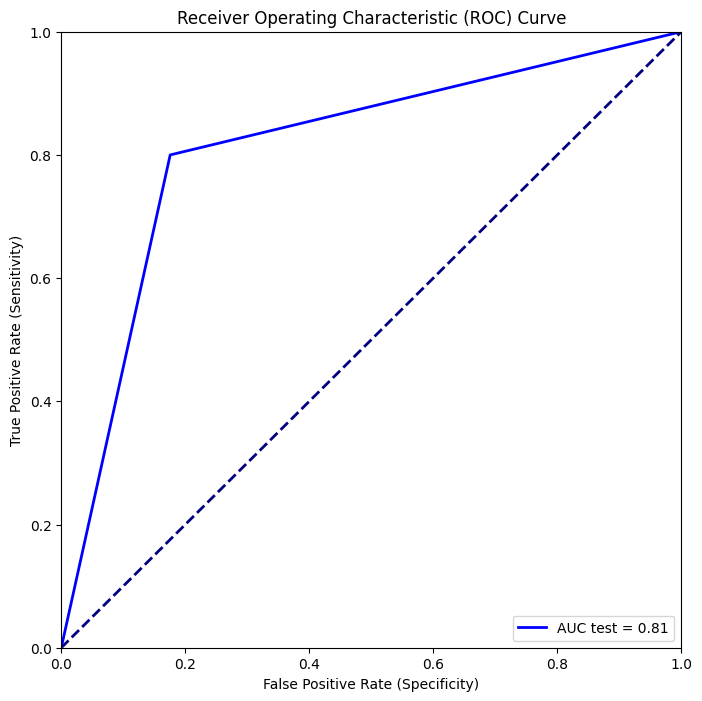

,Model,Accuracy test,Accuracy train,AUC-ROC,cost possitive,cost negatives,mean cost P and cost N
0,Logistic Regression,0.853261,0.855389,0.898280,0.910891,0.836364,0.872038
1,K Nearest Neighbors,0.842391,0.897681,0.912531,0.917526,0.809091,0.859903
2,Decision Tree,0.809783,1.000000,0.812162,0.871287,0.800000,0.834123


In [7]:
#data cleaning and manipulation
import pandas as pd
import numpy as np

#data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

!pip install pandas matplotlib faker

 #machine learning
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score, recall_score, f1_score,precision_score
from sklearn.metrics import roc_curve, roc_auc_score


#Data import
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/heartpredict.csv')

#check the first 5 rows
df.head()
# check the data type of each column
df.dtypes
df.describe()
df.nunique()

# Check for missing values
df.isnull().sum()

# Check for duplicates
df.duplicated().sum()


#DATA VISUALISATION
types = df['HeartDisease'].value_counts()
colors = ['lightgreen', 'gray']

# Create a two-subplot layout
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart on the first subplot
ax1.barh(y=types.index, width=types.values, color=colors)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('HeartDisease')
ax1.grid(alpha=0.4)

# Pie chart on the second subplot
ax2.pie(types.values, labels=types.index, explode=([0.05] * len(types.index)), colors=colors, autopct='%.2f%%')

# Configure the overall layout
fig.suptitle('Distribution of Exercise angina', fontsize=15)
plt.tight_layout(pad=1)
plt.show()

# Desired color palette
palette = ['lightgreen', 'gray', 'lightblue', 'pink', 'purple']  # Adjust colors as needed

# Assuming we have our DataFrame loaded as df

# Iterate through the specified columns and generate pie charts
for column in ['ChestPainType', 'RestingECG', 'ST_Slope', 'ExerciseAngina']:
    # Get value counts and sort in descending order (corrected keyword argument)
    value_counts = df[column].value_counts().sort_values(ascending=False)



    # Get pie chart slice labels and values
    slice_labels = value_counts.index.to_numpy()
    slice_values = value_counts.to_numpy()

    # Create the pie chart with the specified palette
    plt.figure(figsize=(6, 6))  # Adjust figure size as needed
    plt.pie(slice_values, labels=slice_labels, autopct="%1.1f%%", colors=palette[:len(slice_labels)])
    plt.title(f"Distribution of {column}")
    plt.show()

#'Distribution of Heart Disease By Age
plt.figure(figsize=(20, 10))
sns.countplot(x = df['Age'] , hue=df['HeartDisease'], palette=['lightgreen', 'gray'])  # Apply colors
plt.title('Distribution of Heart Disease By Age')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()

#Distribution of HeartDisease By Sex
plt.figure(figsize=(20, 10))
sns.countplot(x = df['Sex'] , hue=df['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By Sex ')
plt.show()

#Chest pain type Vs Heart Disease
plt.figure(figsize=(20, 10))
sns.countplot(x = df['ChestPainType'] , hue=df['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By ChestPainType ')
plt.show()

plt.figure(figsize=(20, 10))
sns.countplot(x = df['RestingBP'] , hue=df['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By RestingBP')  # Corrected title
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

plt.figure(figsize=(20, 10))
sns.countplot(x = df['FastingBS'] , hue=df['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By FastingBS')  # Corrected title
plt.show()

plt.figure(figsize=(25, 10))
sns.countplot(x = df['MaxHR'] , hue=df['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By MaxHR')
plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees
plt.show()

plt.figure(figsize=(25, 10))
sns.countplot(x = df['ExerciseAngina'] , hue=df['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By ExerciseAngina')
plt.show()

plt.figure(figsize=(25, 10))
sns.countplot(x = df['Oldpeak'] , hue=df['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By Oldpeak')
plt.show()

plt.figure(figsize=(25, 10))
sns.countplot(x = df['ST_Slope'] , hue=df['HeartDisease'], palette=['lightgreen', 'gray'])
plt.title('Distribution of HeartDisease By ST_Slope')
plt.show()

plt.figure(figsize=(15,10))
sns.pairplot(df,hue="HeartDisease")
plt.tight_layout()
plt.plot()

plt.figure(figsize=(15, 12), dpi=300)
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, mask=mask, cmap='viridis', linewidth=.5, annot_kws={'size': 9})
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

df.shape
df.describe()

x = df[df.columns[:-1]]
y = df['HeartDisease']

cat_cols=df.select_dtypes(include=['object']).columns
cat_cols
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])
df.corr().style.background_gradient(cmap='coolwarm').format("{:.1%}")

df.drop('RestingECG',axis=1,inplace=True)
df.drop('FastingBS',axis=1,inplace=True)
df.corr().style.background_gradient(cmap='coolwarm').format("{:.1%}")
df.duplicated().sum()
df.drop_duplicates(inplace=True)

scaler = MinMaxScaler()
df= pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df
x=df.drop('HeartDisease',axis=1)
y=df['HeartDisease']
x
y
 #Split the data into training and testing sets
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,random_state=42 )

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

#logistic regression
lr=LogisticRegression()

lr.fit(x_train,y_train)

ypred1_test=lr.predict(x_test)
accuracy1_test = accuracy_score(y_test, ypred1_test)
print(f"Accuracy test: {round(accuracy1_test * 100,2)}%")

ypred1_train=lr.predict(x_train)
accuracy1_train = accuracy_score(y_train, ypred1_train)
print(f"Accuracy train: {round(accuracy1_train * 100,2)}%")

print("Classification Report:")
print(classification_report(y_test, ypred1_test))
pecision1=precision_score(y_test,ypred1_test)
Recall1=recall_score(y_test,ypred1_test)
Fscore1=f1_score(y_test,ypred1_test)

conf_matrix = confusion_matrix(y_test, ypred1_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

ypred1_tp=lr.predict_proba(x_test)[:, 1]
roc_auc1 = roc_auc_score(y_test,ypred1_tp)
fpr, tpr, thresholds = roc_curve(y_test, ypred1_tp)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC test = {roc_auc1:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
ypred2_test=knn.predict(x_test)
accuracy2_test = accuracy_score(y_test, ypred2_test)
print(f"Accuracy test: {round(accuracy2_test * 100,2)}%")

ypred2_train=knn.predict(x_train)
accuracy2_train = accuracy_score(y_train, ypred2_train)
print(f"Accuracy train: {round(accuracy2_train * 100,2)}%")

print("Classification Report:")
print(classification_report(y_test, ypred2_test))
pecision2=precision_score(y_test,ypred2_test)
Recall2=recall_score(y_test,ypred2_test)
Fscore2=f1_score(y_test,ypred2_test)

conf_matrix = confusion_matrix(y_test, ypred2_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

ypred2_tp=knn.predict_proba(x_test)[:, 1]
roc_auc2 = roc_auc_score(y_test,ypred2_tp)
fpr, tpr, thresholds = roc_curve(y_test, ypred2_tp)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC test = {roc_auc2:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#DECISION TREE CLASSIFICATION
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)

ypred3_test = dt.predict(x_test)

accuracy3_test = accuracy_score(y_test, ypred3_test)
print(f"Test Accuracy: {round(accuracy3_test * 100,2)}%")

ypred3_train = dt.predict(x_train)

accuracy3_train = accuracy_score(y_train, ypred3_train)
print(f"Train Accuracy: {round(accuracy3_train * 100,2)}%")

print("Classification Report:")
print(classification_report(y_test, ypred3_test))
pecision3=precision_score(y_test,ypred3_test)
Recall3=recall_score(y_test,ypred3_test)
Fscore3=f1_score(y_test,ypred3_test)

conf_matrix = confusion_matrix(y_test, ypred3_test)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix ')
plt.show()

ypred3_tp=dt.predict_proba(x_test)[:, 1]
roc_auc3 = roc_auc_score(y_test,ypred3_tp)
fpr, tpr, thresholds = roc_curve(y_test, ypred3_tp)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC test = {roc_auc3:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#BEST MODEL
models=pd.DataFrame({
   'Model':
    [ 'Logistic Regression','K Nearest Neighbors','Decision Tree'],
   'Accuracy test':
    [accuracy1_test,accuracy2_test,accuracy3_test],
   'Accuracy train':
    [accuracy1_train,accuracy2_train,accuracy3_train],
   'AUC-ROC':
    [roc_auc1,roc_auc2,roc_auc3],
   'cost possitive':
    [pecision1,pecision2,pecision3],
   'cost negatives':
    [Recall1,Recall2,Recall3],
   'mean cost P and cost N':
 [Fscore1,Fscore2,Fscore3]
})
models


